# Goal
The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product, and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that lead to conversion is called 'funnel'.

Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience. Also, it often allows to discover bugs.

# Description

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:
- The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

- From the home page, the user can perform a search and land on the search page. 

- From the search page, if the user clicks on a product, she will get to the payment page,where she is asked to provide payment information in order to buy that product.

- If she does decide to buy, she ends up on the confirmation page

The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

Specifically, she is interested in :
- A full picture of funnel conversion rate for both desktop and mobile

- Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [184]:
home_page_table = pd.read_csv('/Users/yangzongkun/Desktop/sd/DS Take Home 4-5/5.Funnel_Analysis/home_page_table.csv')
search_page_table = pd.read_csv('/Users/yangzongkun/Desktop/sd/DS Take Home 4-5/5.Funnel_Analysis/search_page_table.csv')
payment_page_table = pd.read_csv('/Users/yangzongkun/Desktop/sd/DS Take Home 4-5/5.Funnel_Analysis/payment_page_table.csv')
payment_confirmation_table = pd.read_csv('/Users/yangzongkun/Desktop/sd/DS Take Home 4-5/5.Funnel_Analysis/payment_confirmation_table.csv')
user_table = pd.read_csv('/Users/yangzongkun/Desktop/sd/DS Take Home 4-5/5.Funnel_Analysis/user_table.csv')

In [185]:
user_table.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [186]:
home_page_table.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [187]:
search_page_table.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [188]:
payment_page_table.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [189]:
payment_confirmation_table.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


# Data Processing

In [190]:
data=pd.merge(user_table,home_page_table,left_on='user_id',right_on='user_id',how='left')
data=pd.merge(data,search_page_table,left_on='user_id',right_on='user_id',how='left',suffixes=('_home', '_search'))
data=pd.merge(data,payment_page_table,left_on='user_id',right_on='user_id',how='left')
data=pd.merge(data,payment_confirmation_table,left_on='user_id',right_on='user_id',how='left',suffixes=('_payment', '_confirmation'))
data.head()

#The suffixes parameter is used to specify a suffix to be added to overlapping column names. 
# In this case, if there are any columns with the same name in both dataframes, the columns in the data dataframe will have the suffix '_home' added
# and the columns in the search_page_table dataframe will have the suffix '_search' added.

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   page_home          90400 non-null  object
 5   page_search        45200 non-null  object
 6   page_payment       6030 non-null   object
 7   page_confirmation  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


# Data Analysis

 Visit Probability for Each Page

In [192]:
Visit_Probability=1-pd.DataFrame(data.isnull().sum()).rename(columns={0: 'Visit Probability'}) /len(data)
Visit_Probability=Visit_Probability.loc['page_home':,['Visit Probability']]
Visit_Probability

,Visit Probability
page_home,1.000000
page_search,0.500000
page_payment,0.066704
page_confirmation,0.005000


(array([0, 1, 2, 3]),
 [Text(0, 0, 'page_home'),
  Text(1, 0, 'page_search'),
  Text(2, 0, 'page_payment'),
  Text(3, 0, 'page_confirmation')])

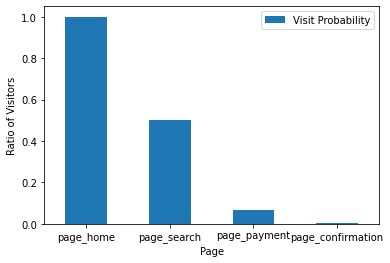

In [193]:
Visit_Probability.plot(kind='bar')

plt.ylabel('Ratio of Visitors')
plt.xlabel('Page')
plt.xticks(rotation=0)#to make the X axis labels horizontal in a bar chart

Conversion Rate for Each Page

In [194]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [195]:
# function to calculate conversion rates for home, search and payment page

def conversion_rate(df):
    rates = []
    
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates

In [196]:
rates = conversion_rate(data)
rates

[0.5, 0.13340707964601772, 0.07495854063018237]

In [197]:
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': rates}
maps

{'Page': ['home', 'search', 'payment'],
 'Conversion Rate': [0.5, 0.13340707964601772, 0.07495854063018237]}

In [198]:
overall_conv = pd.DataFrame(maps, columns=['Page', 'Conversion Rate'])

overall_conv

,Page,Conversion Rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


(array([0, 1, 2]),
 [Text(0, 0, 'home'), Text(1, 0, 'search'), Text(2, 0, 'payment')])

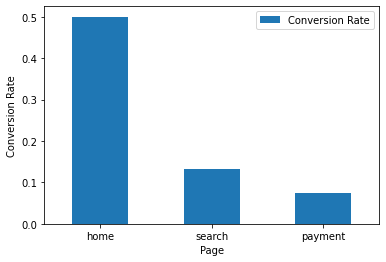

In [199]:
overall_conv.plot(x='Page',y='Conversion Rate',kind='bar')

plt.ylabel('Conversion Rate')
plt.xlabel('Page')
plt.xticks(rotation=0)#to make the X axis labels horizontal in a bar chart

Conversion rate for both desktop and mobile

In [200]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [201]:
# The conversion_rate function is used to calculate the conversion rate for each page for two different device types, desktop and mobile.
desk_rates = conversion_rate(data[data['device'] == 'Desktop'])
mobile_rates = conversion_rate(data[data['device'] == 'Mobile'])

In [202]:
desk_rates

[0.5, 0.09999999999999998, 0.04983388704318936]

In [203]:
mobile_rates

[0.5, 0.19999999999999996, 0.09999999999999998]

In [204]:
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Desktop', 'Mobile'))
print('-' * 40)
# The table header is defined using the format method of the print function 
# with the string '{0:^10s} | {1:^10s} | {2:^10s}' as the first argument. 
# This string specifies that three columns should be printed
# each with a width of 10 characters and with the contents centered.

   Page    |  Desktop   |   Mobile  
----------------------------------------


In [205]:
names = ['home', 'search', 'payment']
for name, desk_rate, mobile_rate in zip(names, desk_rates, mobile_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, desk_rate, mobile_rate))

# The table body is generated using a for loop that iterates over the zip of the names, desk_rates, and mobile_rates lists.
# In each iteration, a single row of the table is printed using the print function and the format method
# The first column is a string (s), while the second and third columns are floating-point numbers (f) with 6 decimal places.

home       |   0.500000 |   0.500000
search     |   0.100000 |   0.200000
payment    |   0.049834 |   0.100000


In [206]:
#combine it 
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Desktop', 'Mobile'))
print('-' * 40)

names = ['home', 'search', 'payment']
for name, desk_rate, mobile_rate in zip(names, desk_rates, mobile_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, desk_rate, mobile_rate))


   Page    |  Desktop   |   Mobile  
----------------------------------------
home       |   0.500000 |   0.500000
search     |   0.100000 |   0.200000
payment    |   0.049834 |   0.100000


In [207]:

maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desk_rates + mobile_rates}
# a dictionary called maps is created that contains three keys: 'Page', 'Device', and 'Conversion Rate'. 
# The values for the 'Page' key are a list of page names ['home', 'search', 'payment', 'home', 'search', 'payment']. 
# The values for the 'Device' key are a list of device types ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile']. 
# The values for the 'Conversion Rate' key are a concatenation of the desk_rates and mobile_rates lists.

device_conv = pd.DataFrame(maps, columns=['Page', 'Device', 'Conversion Rate'])
# The columns argument is used to specify the order of the columns in the resulting DataFrame.
device_conv

,Page,Device,Conversion Rate
0,home,Desktop,0.500000
1,search,Desktop,0.100000
2,payment,Desktop,0.049834
3,home,Mobile,0.500000
4,search,Mobile,0.200000
5,payment,Mobile,0.100000


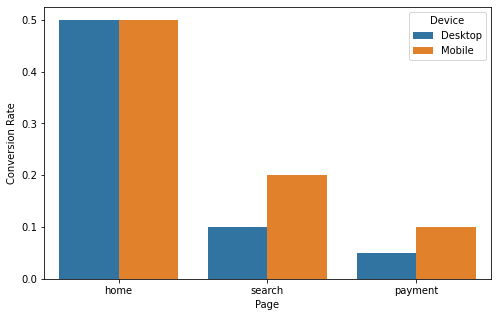

In [208]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=device_conv, ax=ax, hue='Device')
plt.show()

Conversion rate by gender

In [209]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [210]:
male_rates = conversion_rate(data[data['sex'] == 'Male'])
female_rates = conversion_rate(data[data['sex'] == 'Female'])

print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Male', 'Female'))
print('-' * 40)

names = ['home', 'search', 'payment']
for name, male_rate, female_rate in zip(names, male_rates, female_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, male_rate, female_rate))


   Page    |    Male    |   Female  
----------------------------------------
home       |   0.496944 |   0.503073
search     |   0.130083 |   0.136708
payment    |   0.072014 |   0.077742


In [211]:
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'], 
        'Conversion Rate': male_rates + female_rates}

sex_conv = pd.DataFrame(maps, columns=['Page', 'Sex', 'Conversion Rate'])
# The columns argument is used to specify the order of the columns in the resulting DataFrame.
sex_conv

,Page,Sex,Conversion Rate
0,home,Male,0.496944
1,search,Male,0.130083
2,payment,Male,0.072014
3,home,Female,0.503073
4,search,Female,0.136708
5,payment,Female,0.077742


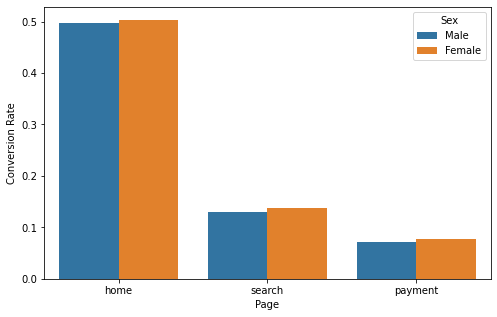

In [212]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=sex_conv, ax=ax, hue='Sex')
plt.show()